In [ ]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 데이터분리 
# -> 모델 선정 -> 학습 -> 평가 -> 피드백
# (재학습OR모델변경OR전처리,....) -> (배포)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 수집 및 전처리 (모돌에 학습할 데이터 준비)
# 기본 데이터를 학습 데이터와 테스트데이터로 8:2 준비
# 학습 데이터 X_train(feature), y_train(label) / 테스트 데이터 X_test, y_test
X_train_, X_test, y_train, t_test = train_test_split(
    iris_data, iris_label,
    train_size = 0.8,           # 80% 학습 데이터 사용
    shuffle = False,            # 무작위 섞음 옵션
    stratify= iris_data.label,  # 라벨데이터로 비율을 마춘다
    random_state = 11           # 테스트 시 재현성 확보를 위해
)

# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(X_train_, y_train)

# 4. 예측 (준비해놓은 테스트데이터 사용)
y_pred = model.predict(X_test)

# 5. 평가
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(mse)
print(r2)

# 시각화


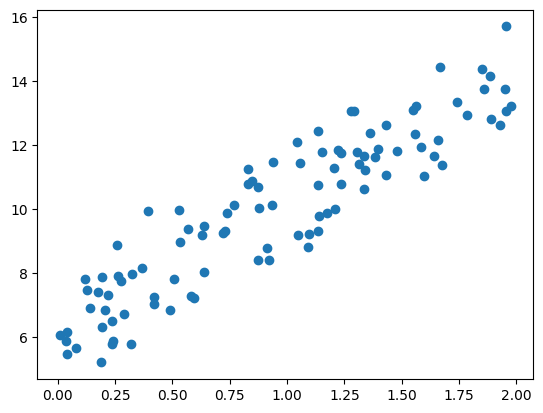

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 0~2까지의 랜덤값 100개
y = 6 + 4 * X + np.random.randn(100, 1) # Y = 6 + 4X + 잡음(Random Noise)

# 데이터 시각화
plt.scatter(X, y)
plt.show()


6.2221510774471165


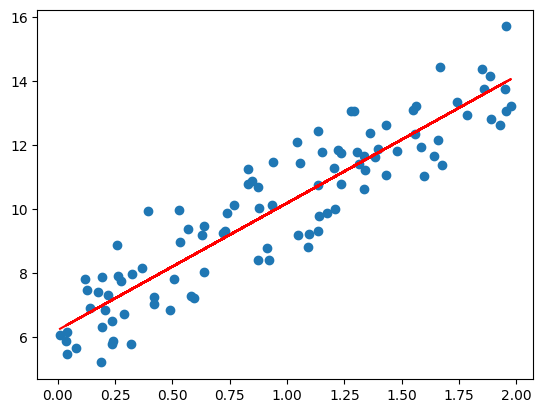

In [ ]:

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)                                  # 샘플수   
    cost = np.sum(np.square(y - y_pred)) / N    # 평균제곱오차
    return cost

# 가중치(w1, w10) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산

    w0_factors = np.ones((N, 1))    # w0 업데이트하는 상수 1 배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))  # w1 업데이트 값
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트 값

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))   # 초기 w0값 설정
    w1 = np.zeros((1, 1))   # 초기 w1값 설정

    # 가중치 업데이트 값 계산
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update     # w1 업데이트 적용
        w0 = w0 - w0_update     # w0 업데이트 적용

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)   # 원본 데이터
plt.plot(X, y_pred, color='r')  # 경사하강법으로 학습된 직선
plt.show()

1. 데이터 만들고
2. 선형모델 만들기
3. 손실 계산
4. 기울기 구하기
5. 파라미터 업데이트
6. 수렴할때까지 반복

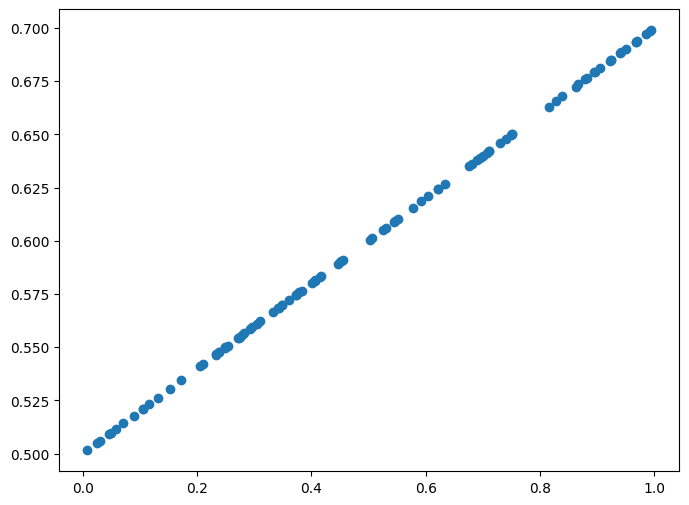

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.random.rand(100)     # 0~1 데이터 100개 생성
y = 0.2 * X + 0.5           # 정답 Y (기울기 0.2, 절편 05인 직선)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X,y)            # 산점도 플롯
plt.show()

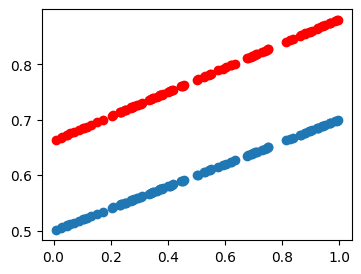

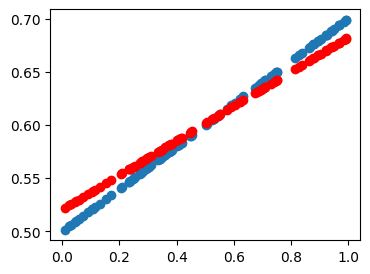

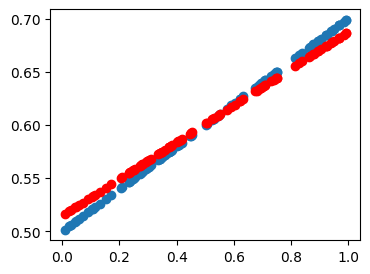

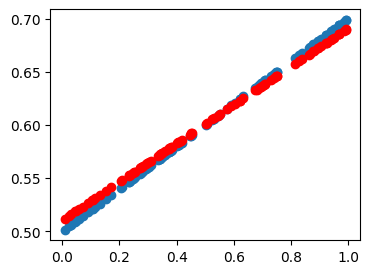

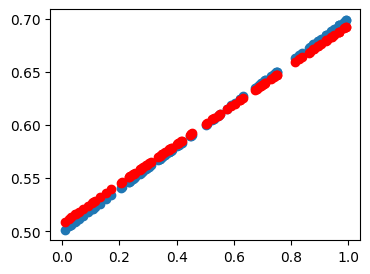

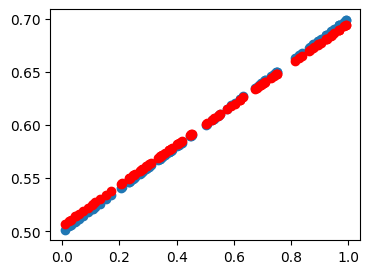

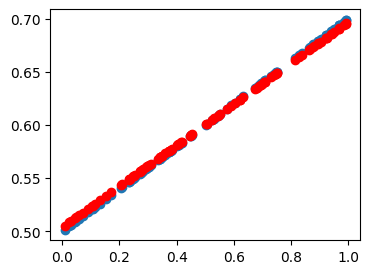

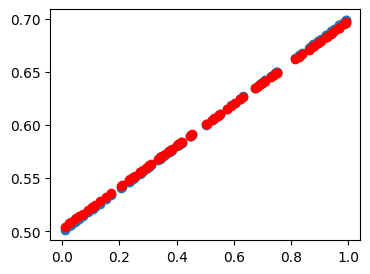

W:  0.19631267227126303
b:  0.5019910602965734


In [ ]:
# 가중치와 편향 초기화
W = np.random.uniform(-1,1) # 가중치 W를 -1~1 사이 랜덤값으로 초기화
b = np.random.uniform(-1,1) # 편향 b를 -1~1 사이 랜덤값으로 초기화

# 에측 결과 시각화 함수
def plot_pred(pred, y):
    plt.figure(figsize=(4,3))
    plt.scatter(X, y)                   # 실제 데이터
    plt.scatter(X, pred, color='red')   # 예측 값 (빨간 점)
    plt.show()
    
# 경사하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred = W * X + b         # 현재 W, b로 예측값 계산
    
    error = np.abs(y_pred - y).mean()   # 예측값과 실제값의 평균 절대오차(MAE)
    
    w_grad = lr * ((y_pred - y) * X).mean()     # W에 대한 기울기 계산 후 학습률 곱하기
    b_grad = lr * (y_pred - y).mean()     # b에 대한 기울기 계산 후 학습률 곱하기
    
    W = W - w_grad  # 가중치 W를 경사하강법으로 업데이트
    b = b - b_grad  # b에 대한 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기 종료) = > 스케쥴러
    if error < 0.001:
        break
    
    if epoch % 10 == 0:         # 10번 에폭마다
        y_pred = W * X + b      # 최신 W,b로 다시 예측값 계산
        plot_pred(y_pred,y)     # 얘측결과를 시각화
        
# 최종 학습된 가중치와 편향 확인
print("W: ", W)
print("b: ", b)

기울기(coefficient): 2.0
절편(intercept): -0.20000000000000018
MSE: 0.15999999999999992
R2 Score: 0.9803921568627451


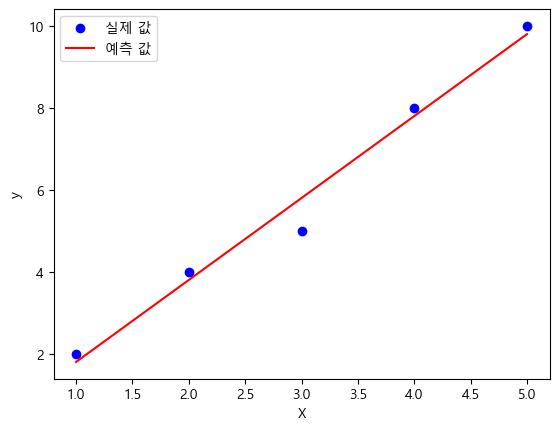

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # 선형외귀모델
from sklearn.metrics import mean_squared_error, r2_score    # 평가지표 MSE, R2

plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 데이터 생성
X = np.array([[1], [2], [3], [4], [5]]) # 입력값(2차원 형태)
y = np.array([2, 4, 5, 8, 10])          # 실제 출력값

# print(X.shape)
# print(y.shape)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 값 계산
y_pred = model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'기울기(coefficient): {model.coef_[0]}') # 학습된 기울기 W 출력
print(f'절편(intercept): {model.intercept_}')   # 학습된 절편 b 출력
print(f'MSE: {mse}')                            # MSE (평균제곱오차)
print(f'R2 Score: {r2}')                        # R2 스코어

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()        # 범례
plt.show()

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression   # 선형회귀 모델
from sklearn.metrics import mean_squared_error      # MES(평균제곱오차) 

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# 모델 생성
mpdel = LinearRegression()
model.fit(X,y)

# 예측값 계산
y_pred = model.predict(X)

print(y_pred)

print(y)
# 평가 지표 계산
mse = mean_squared_error(y,y_pred)

print(f'기울기(coefficient): {model.coef_[0]}') # 학습된 기울기 W 출력
print(f'절편(intercept): {model.intercept_}')   # 학습된 절편 b 출력
print(f'MSE: {mse}')                            # MSE (평균제곱오차)

[500.77319588 551.08247423 477.78350515 528.09278351 477.26804124]
[500 550 480 530 475]
기울기(coefficient): 5.3608247422680355
절편(intercept): 259.4329896907218
MSE: 3.0927835051547214


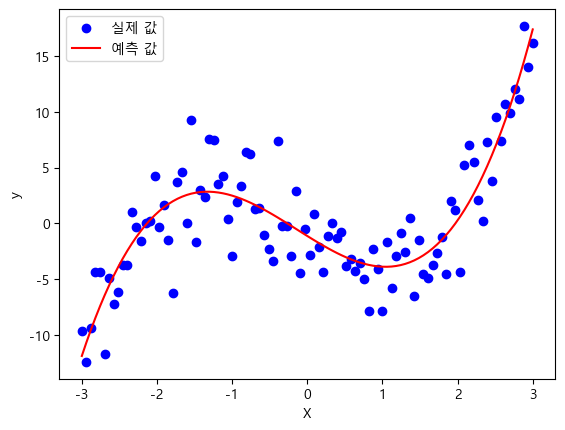

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 특성 변환 
poly_feature = PolynomialFeatures
    
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측 값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

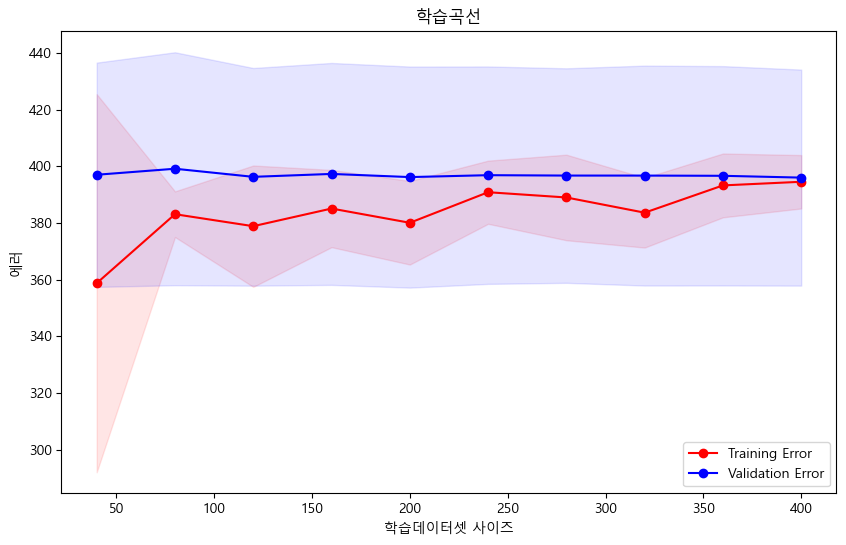

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve  # 학습곡선 개선 모델
from sklearn.linear_model import LinearRegression   # 선형회귀모델
from sklearn.datasets import make_regression        # 회귀용 예제 데이터셋

# 데이터 생성 (샘플 500개, 특징 1개, 노이즈 포함)
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_score = learning_curve(
    LinearRegression(),                     # 선형회귀모델
    X, y,                                   # 입력(X), 타겟(y)
    cv = 5,                                 # 교차검증 5-fold
    scoring = 'neg_mean_squared_error',     # MSE 사용
    train_sizes=np.linspace(0.1, 1.0,10)    # 0.1~1.0까지 10단계로 점차적으로 증가
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1)     # train scores 평균(MES). 음수를 양수로 변경
train_std = train_scores.std(axis=1)        # train_score 표준편차
val_mean = -val_score.mean(axis=1)          # validation scores 평균(MES). 음수를 양수로 변경
val_std = val_score.std(axis=1)            # validation scores 표준편차

# 학습곡선 시각화
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Error', color='red')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Error', color='blue')

# 표준편차 영역 (불확실성 영역) 표시
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='red')   # 훈련 에러 신뢰구간
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')    # 검증 에러 신뢰구간

plt.xlabel("학습데이터셋 사이즈")
plt.ylabel("에러")
plt.title("학습곡선")
plt.legend()
plt.show()